In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot,plot
init_notebook_mode(connected = True)

In [4]:
import sys
print('python: {}'.format(sys.version[0:5]))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('seaborn: {}'.format(sns.__version__))

python: 3.9.7
numpy: 1.20.3
pandas: 1.3.4
seaborn: 0.11.2


In [5]:
import os
os.listdir(r'E:\Data Analysis\Super market sales data analysis\Datasets')

['supermarket_sales - Sheet1.csv']

In [7]:
sales = pd.read_csv(r'E:\Data Analysis\Super market sales data analysis\Datasets/supermarket_sales - Sheet1.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
# Data preprocessing
sales['Date']= pd.to_datetime(sales['Date'])
sales['Time']= pd.to_datetime(sales['Time'])

In [17]:
def fetch_day(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day, month,year])

In [21]:
def fetch_time(y):
    Hour = y.hour
    return pd.Series(Hour)

In [22]:
sales[['day','month','year']] = sales['Date'].apply(fetch_day)

In [23]:
sales['Hour'] = sales['Time'].apply(fetch_time)

In [24]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'Hour'],
      dtype='object')

In [25]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-10-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-10-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-10-09 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-10-09 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-10-09 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [27]:
sales.drop(['Date','Time'], axis =1, inplace= True)

In [28]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'day',
       'month', 'year', 'Hour'],
      dtype='object')

In [35]:
#Describtive analysis of super market
numerical = np.round(sales.describe().T,2)
numerical

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.67,26.49,10.08,32.88,55.23,77.94,99.96
Quantity,1000.0,5.51,2.92,1.00,3.00,5.00,8.00,10.00
Tax 5%,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Total,1000.0,322.97,245.89,10.68,124.42,253.85,471.35,1042.65
cogs,1000.0,307.59,234.18,10.17,118.50,241.76,448.90,993.00
gross margin percentage,1000.0,4.76,0.00,4.76,4.76,4.76,4.76,4.76
gross income,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Rating,1000.0,6.97,1.72,4.00,5.50,7.00,8.50,10.00
day,1000.0,15.26,8.69,1.00,8.00,15.00,23.00,31.00
month,1000.0,1.99,0.84,1.00,1.00,2.00,3.00,3.00


In [36]:
categorical = sales.describe(include =[object]).T
categorical

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Payment,1000,3,Ewallet,345


<AxesSubplot:>

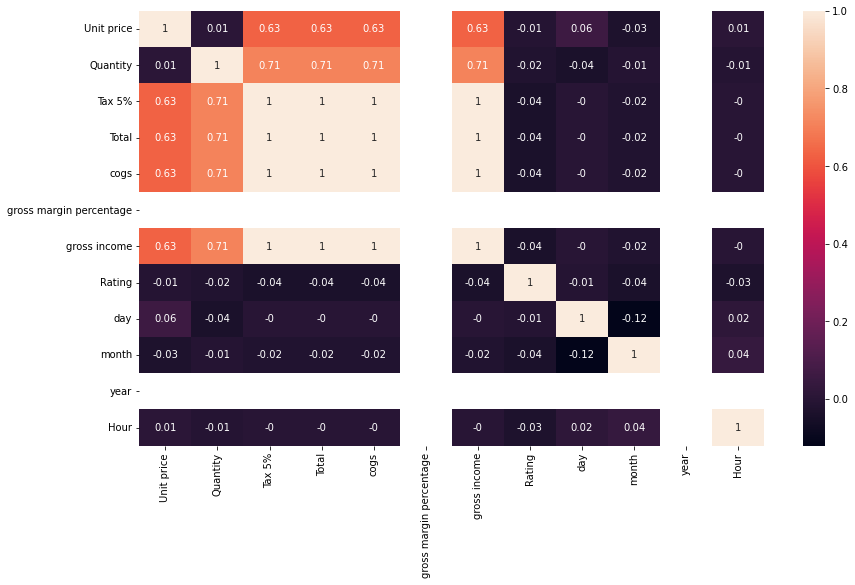

In [38]:
plt.figure(figsize = (14,8))
sns.heatmap(np.round(sales.corr(),2), annot = True)

In [40]:
sales.corr()['Unit price']

Unit price                 1.000000
Quantity                   0.010778
Tax 5%                     0.633962
Total                      0.633962
cogs                       0.633962
gross margin percentage         NaN
gross income               0.633962
Rating                    -0.008778
day                        0.057021
month                     -0.027387
year                            NaN
Hour                       0.008242
Name: Unit price, dtype: float64

<AxesSubplot:xlabel='Unit price', ylabel='Tax 5%'>

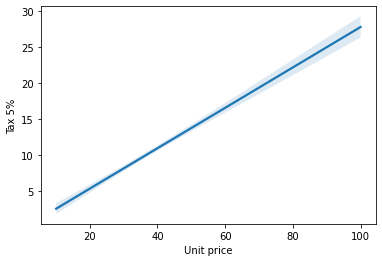

In [45]:
sns.regplot('Unit price','Tax 5%', data = sales, scatter = False)

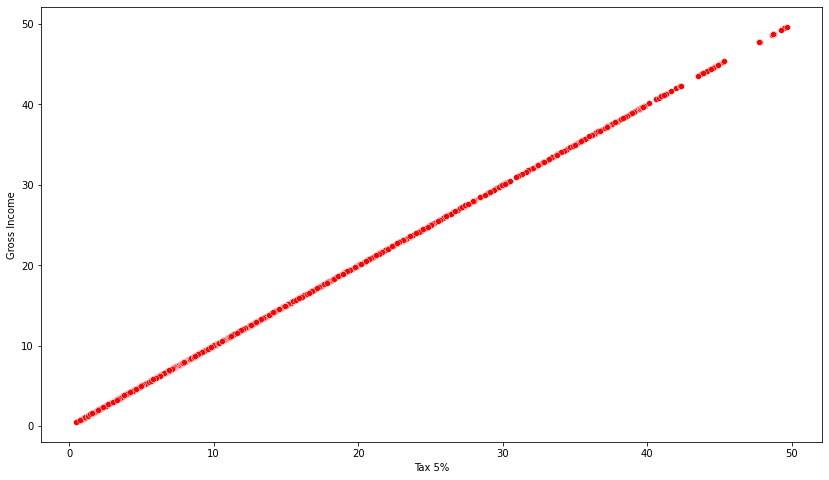

In [53]:
plt.figure(figsize = (14,8))
sns.scatterplot('Tax 5%','gross income',data = sales, color = 'red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

<Figure size 1008x576 with 0 Axes>

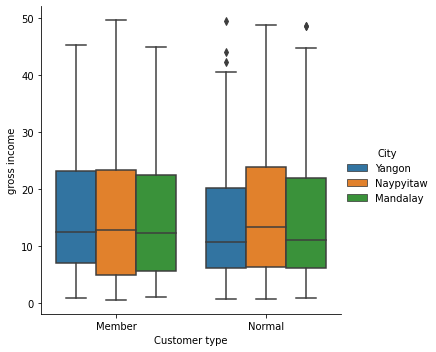

In [71]:
plt.figure(figsize = (14,8))
sns.catplot('Customer type','gross income',hue = 'City', kind = 'box', data = sales, )

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

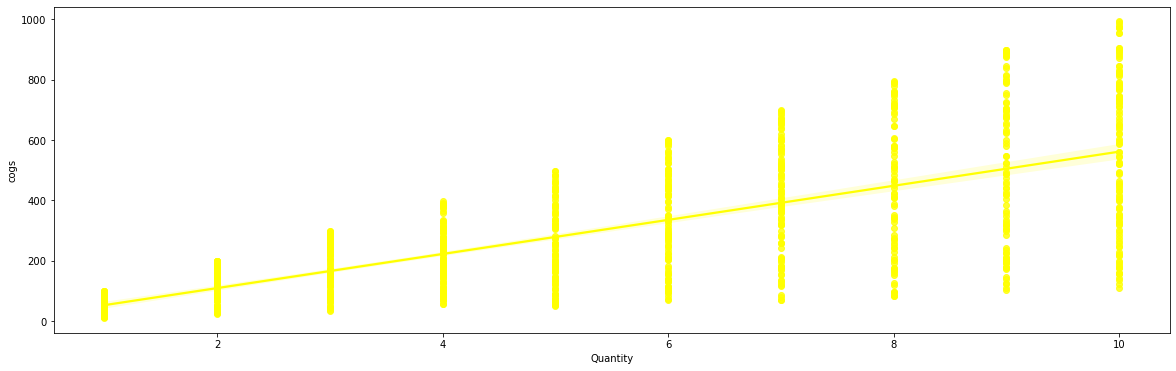

In [70]:
plt.figure(figsize =(20,6))
sns.regplot('Quantity','cogs',color = 'yellow', scatter = True, data = sales)

In [67]:
sales.corr()['cogs']

Unit price                 0.633962
Quantity                   0.705510
Tax 5%                     1.000000
Total                      1.000000
cogs                       1.000000
gross margin percentage         NaN
gross income               1.000000
Rating                    -0.036442
day                       -0.002515
month                     -0.022301
year                            NaN
Hour                      -0.002770
Name: cogs, dtype: float64

<AxesSubplot:xlabel='City'>

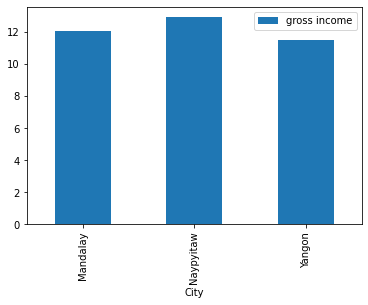

In [82]:
#which city has more Gross Income
sales[['City','gross income']].groupby('City').median().plot(kind = 'bar')

In [149]:
#Mean Rating

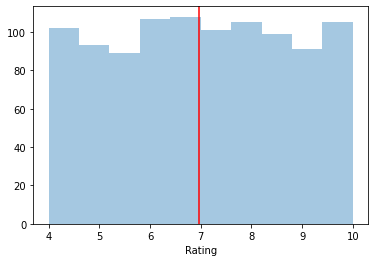

In [155]:
sns.distplot(sales['Rating'],kde =False)
plt.axvline(x = np.mean(sales['Rating']),c ='red',label ='avg rating')


<AxesSubplot:xlabel='City'>

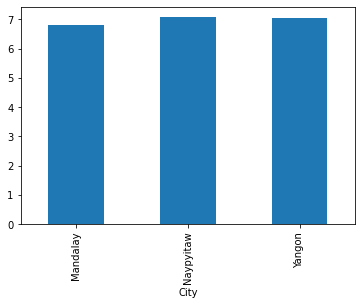

In [157]:
sales.groupby('City')['Rating'].mean().plot(kind ='bar')

In [161]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'day',
       'month', 'year', 'Hour'],
      dtype='object')

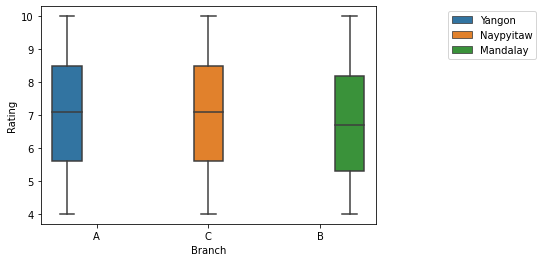

In [170]:
#Find distribution of each & every branch ratings
sns.boxplot('Branch','Rating', hue ='City', data = sales)
plt.legend(bbox_to_anchor= (1.2,1))

In [177]:
sales[['Branch', 'City']].value_counts()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

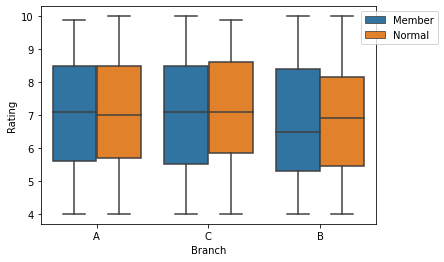

In [178]:
sns.boxplot('Branch','Rating', hue ='Customer type', data = sales)
plt.legend(bbox_to_anchor= (1.2,1))

<AxesSubplot:xlabel='Quantity', ylabel='Hour'>

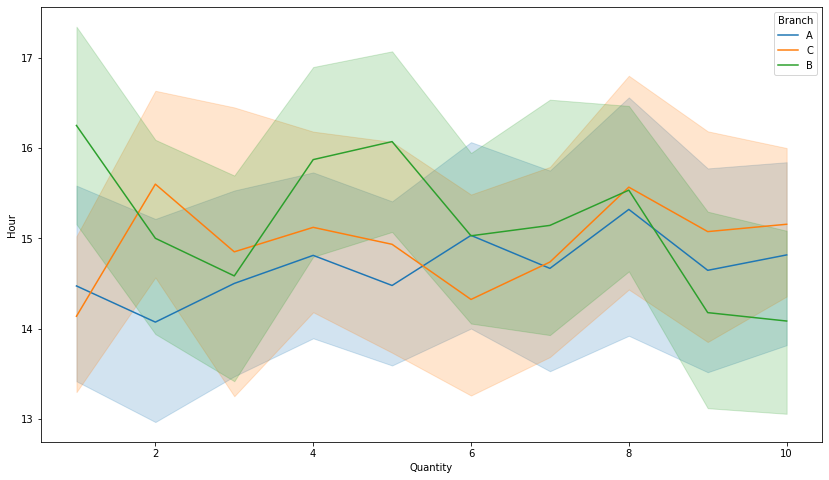

In [183]:
#Sales by the hour Analysis
plt.figure(figsize = (14,8))
sns.lineplot('Quantity','Hour',hue ='Branch', data =sales)

<AxesSubplot:xlabel='Quantity', ylabel='Hour'>

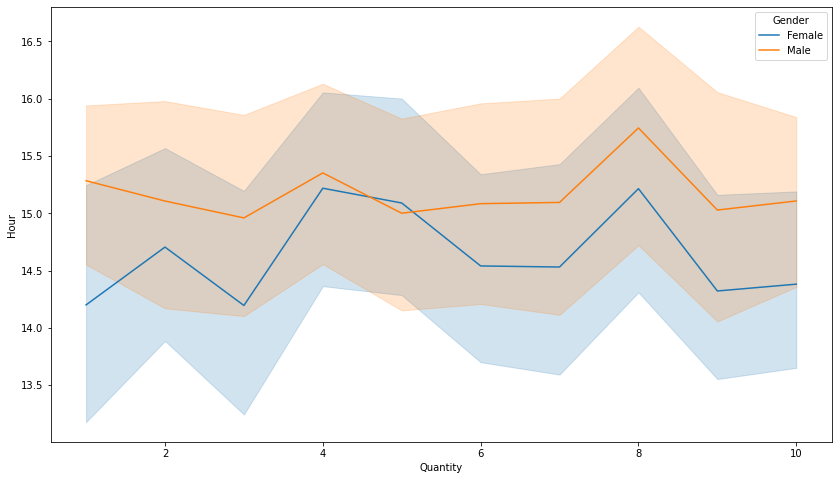

In [185]:
plt.figure(figsize = (14,8))
sns.lineplot('Quantity','Hour',hue ='Gender', data =sales)

<AxesSubplot:xlabel='Quantity', ylabel='Gender'>

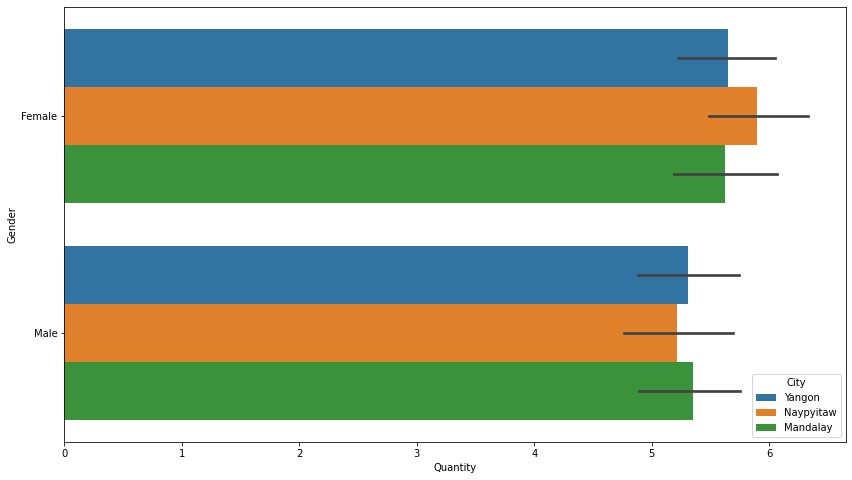

In [193]:
plt.figure(figsize = (14,8))
sns.barplot('Quantity','Gender',hue = 'City', data =sales)

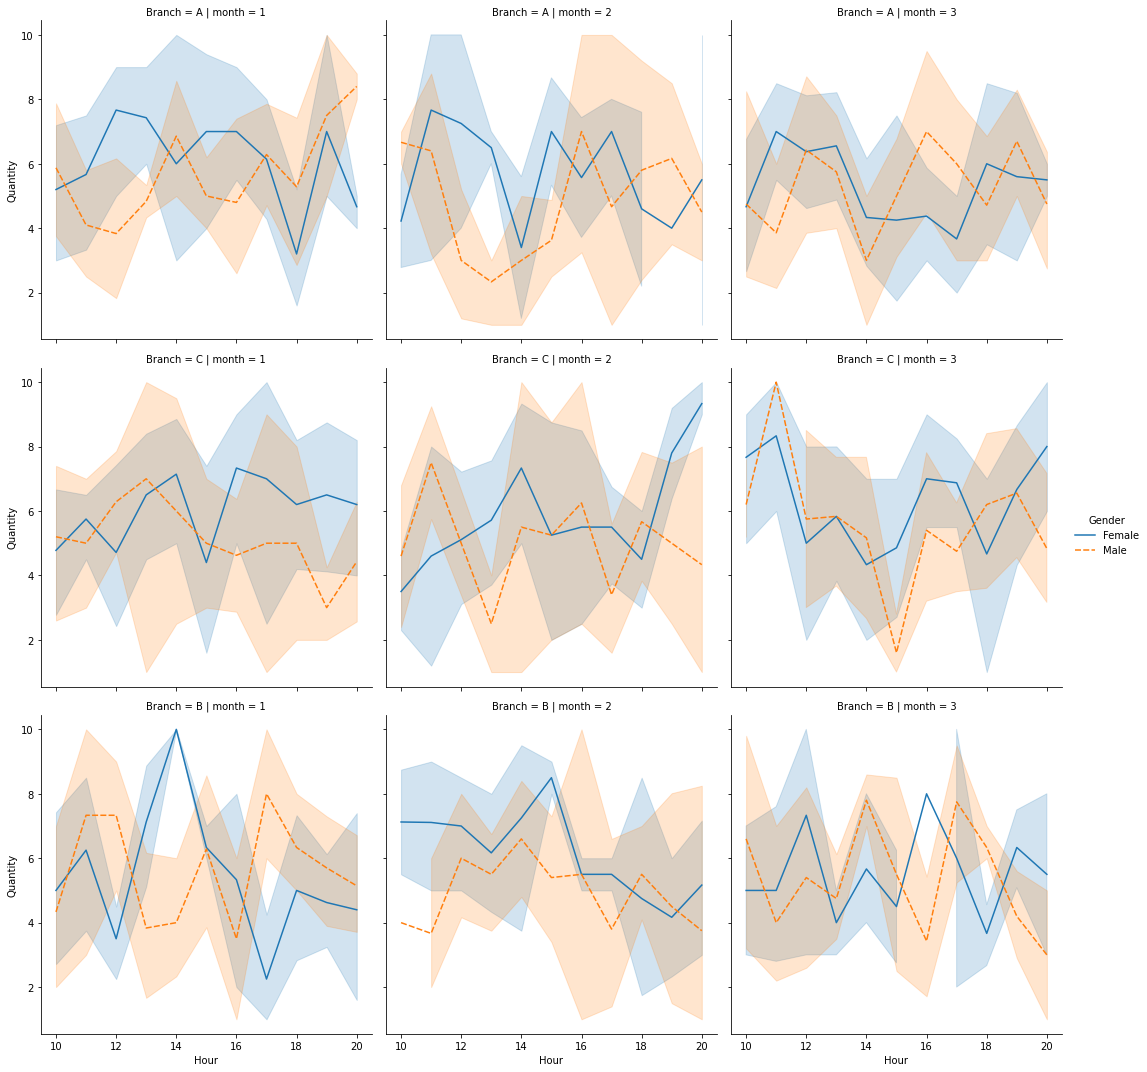

In [231]:
#how much sales occurs in each & every branch with respect to each & every month
sns.relplot(x="Hour",y = 'Quantity',col ='month',row ='Branch', kind = "line",hue ="Gender",style ="Gender",data = sales)

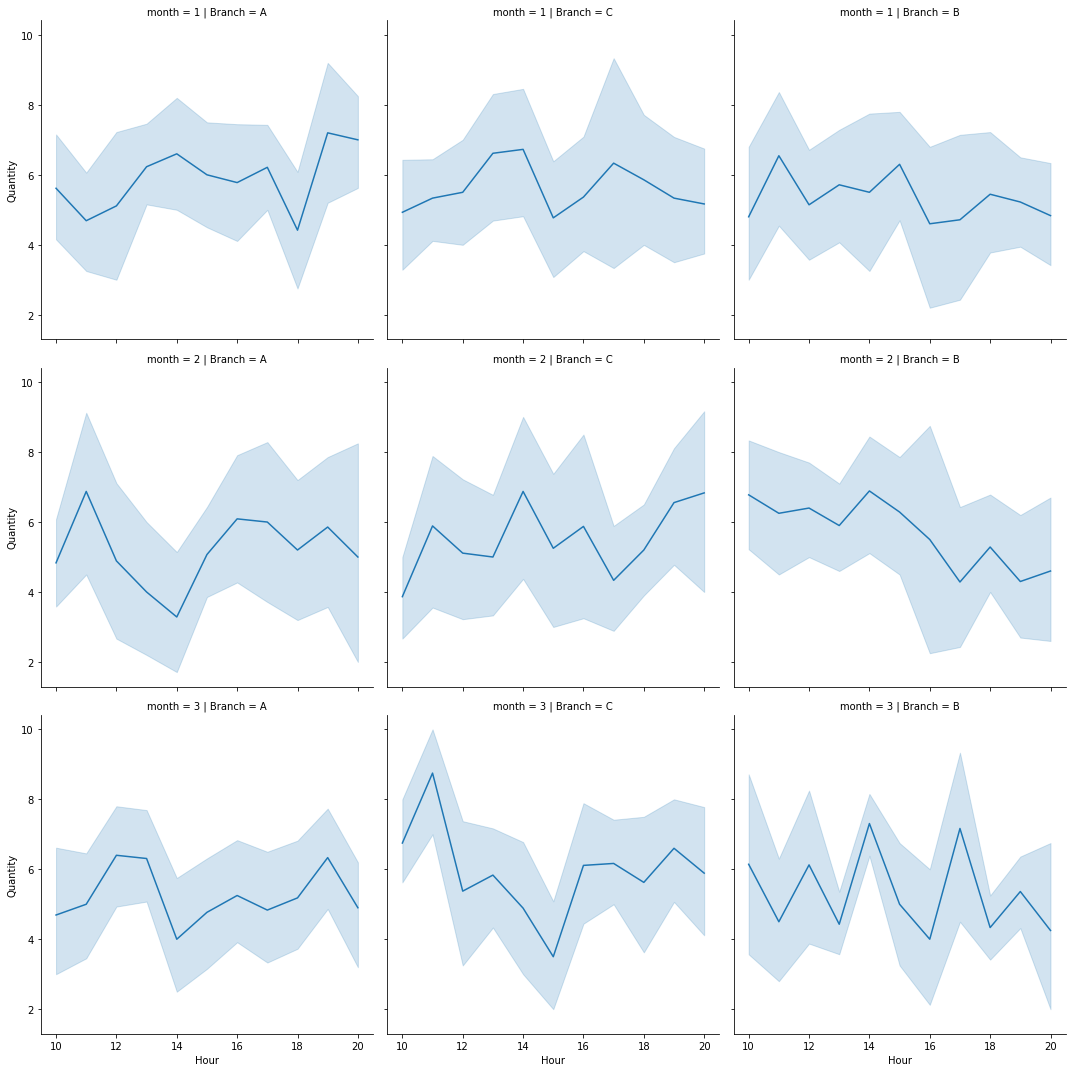

In [232]:
#Analysing branch's sales per hour in a monthly fashion
sns.relplot(x = 'Hour', y = 'Quantity', col= 'Branch', row ='month',kind = 'line',data = sales)

In [233]:
#Let's see when customers buy certain products in the various branches.
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'day',
       'month', 'year', 'Hour'],
      dtype='object')

<Figure size 1008x576 with 0 Axes>

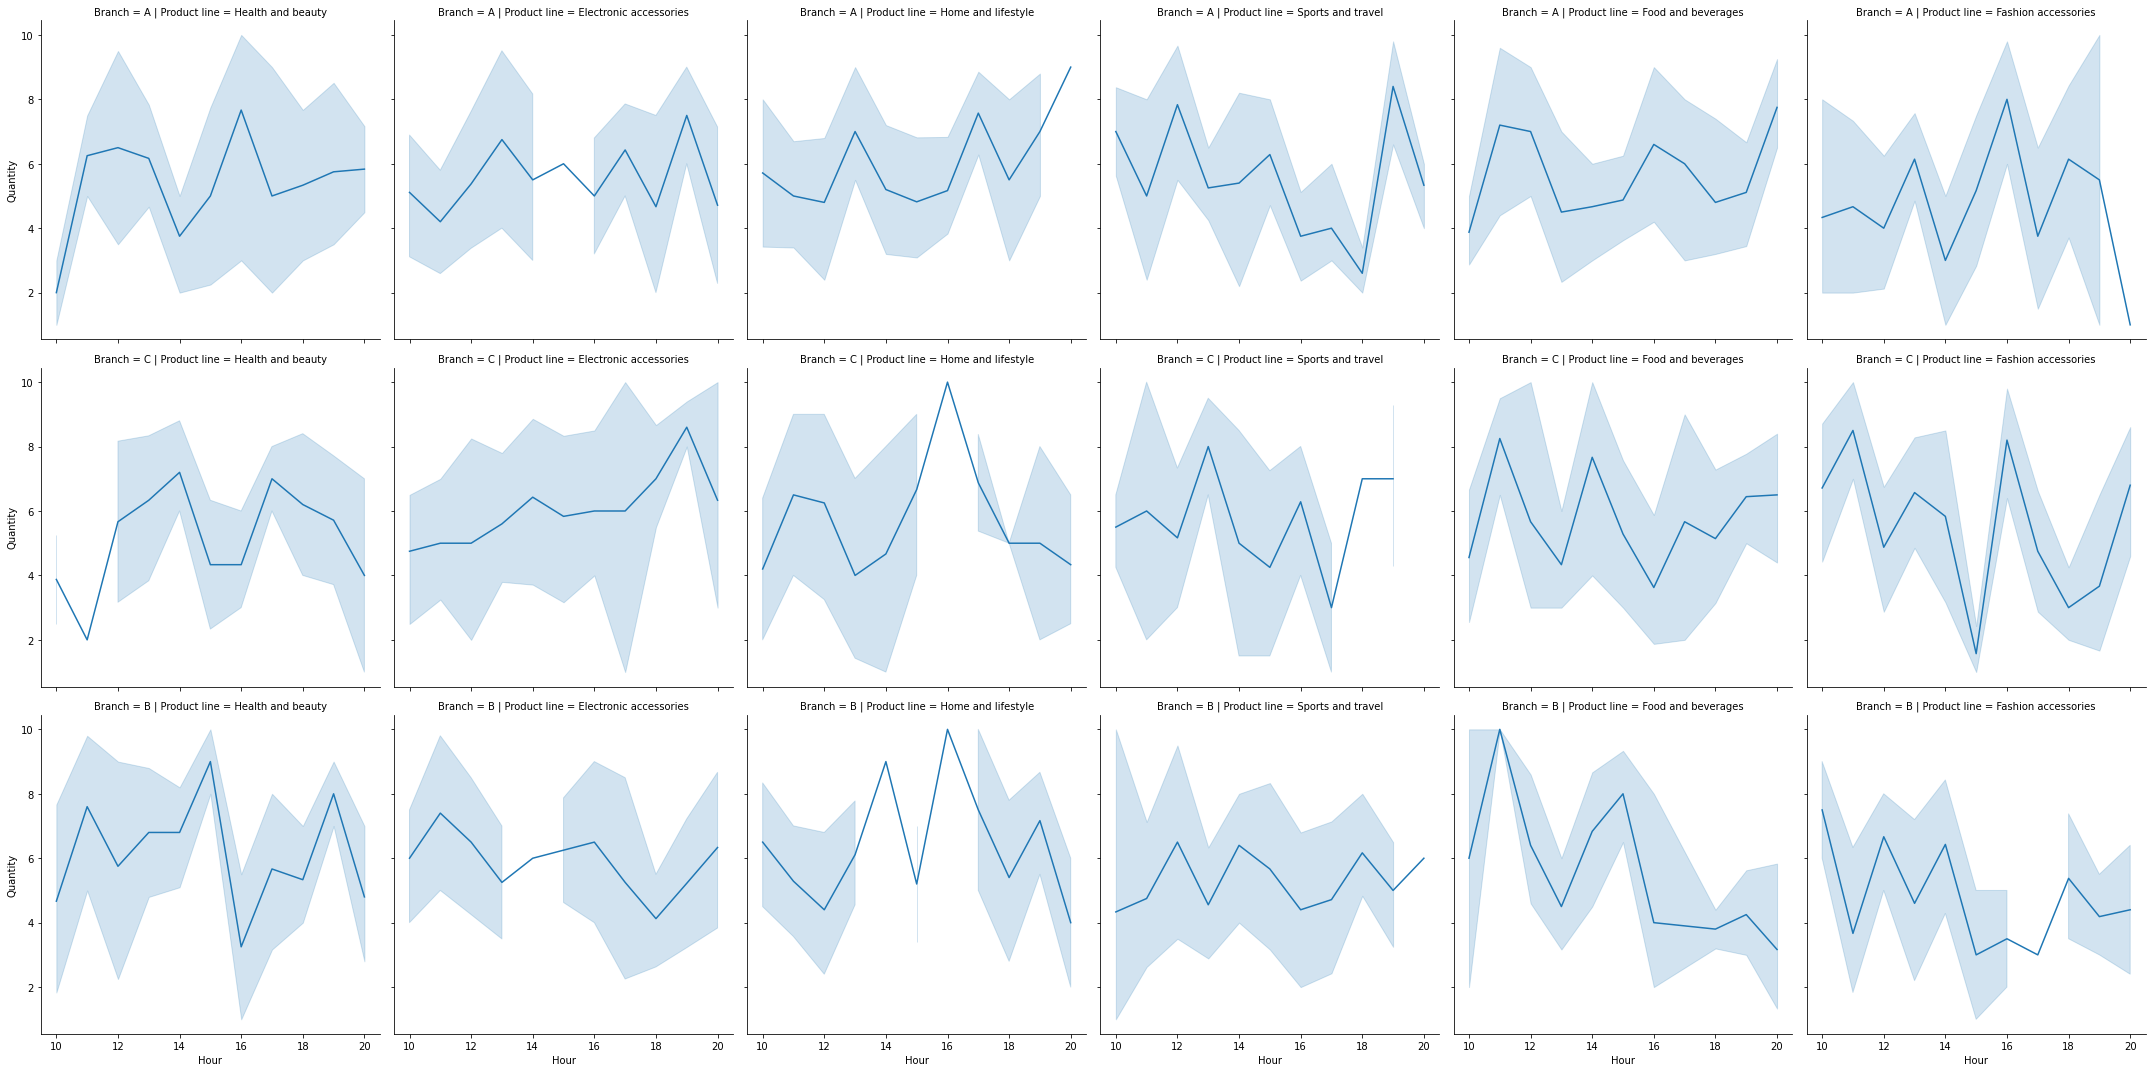

In [241]:
plt.figure(figsize = (14,8))
sns.relplot(x = 'Hour', y ='Quantity', col ='Product line', row = 'Branch',kind = 'line', data=sales)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

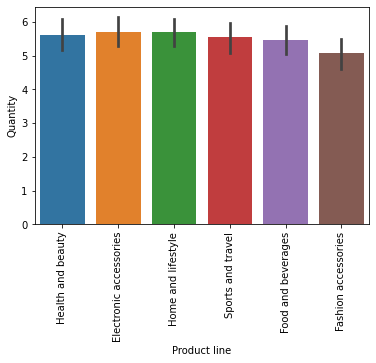

In [243]:
#lets perform product analysis
sns.barplot(x='Product line', y = 'Quantity', data = sales)
plt.xticks(rotation ='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

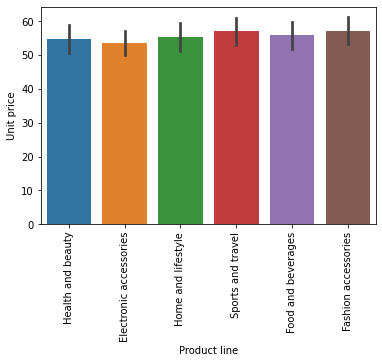

In [244]:
sns.barplot(x='Product line', y = 'Unit price', data = sales)
plt.xticks(rotation ='vertical')

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

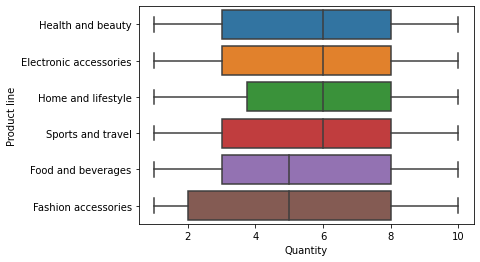

In [249]:
#lets perform distribution of the product line
sns.boxplot(x = 'Quantity', y ='Product line',data =sales)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

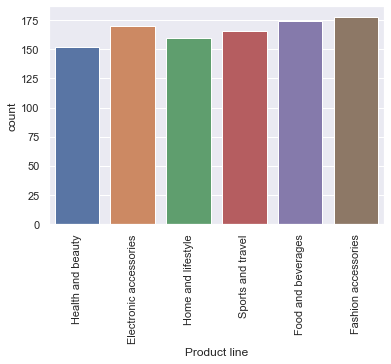

In [258]:
sns.set_theme(style="darkgrid", palette='deep')
sns.countplot('Product line', data = sales)
plt.xticks(rotation = 'vertical')

<AxesSubplot:>

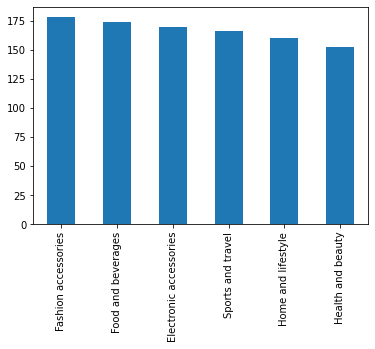

In [255]:
sales['Product line'].value_counts().plot(kind ='bar')

<AxesSubplot:xlabel='gross income', ylabel='Product line'>

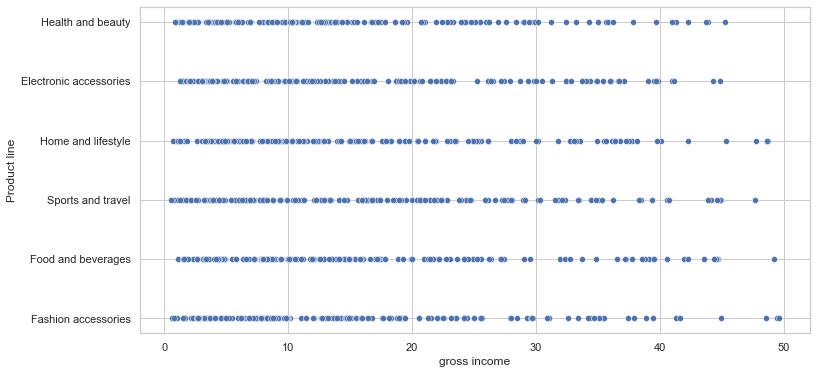

In [260]:
#relationship between Gross_income & Product_line
plt.figure(figsize =(12,6))
sns.set_theme(style='whitegrid')
sns.scatterplot('gross income', 'Product line', data = sales)

<AxesSubplot:xlabel='gross income', ylabel='Product line'>

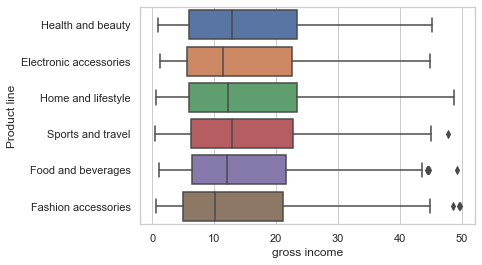

In [261]:
sns.boxplot('gross income', 'Product line', data = sales)

In [282]:
sales[['gross income','Product line']].groupby('Product line').max()

,gross income
Product line,
Electronic accessories,44.8785
Fashion accessories,49.6500
Food and beverages,49.2600
Health and beauty,45.2500
Home and lifestyle,48.7500
Sports and travel,47.7200


<AxesSubplot:>

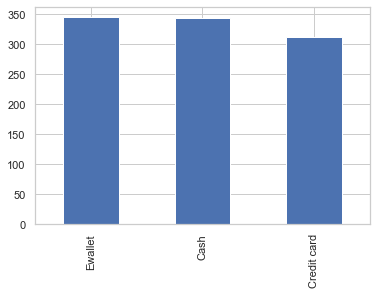

In [288]:
#Let see how customers make payment in this business
sales['Payment'].value_counts().plot(kind = 'bar' )

<AxesSubplot:xlabel='Payment', ylabel='count'>

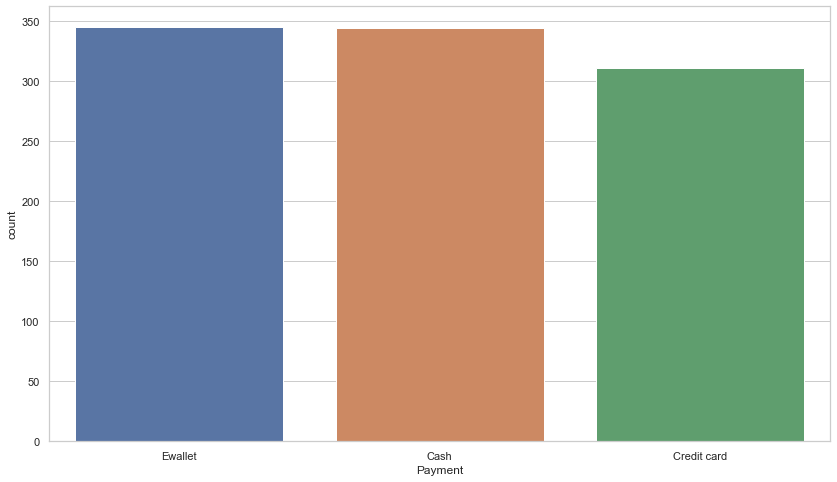

In [286]:
plt.figure(figsize = (14,8))
sns.countplot(sales['Payment'])

<AxesSubplot:xlabel='Payment', ylabel='count'>

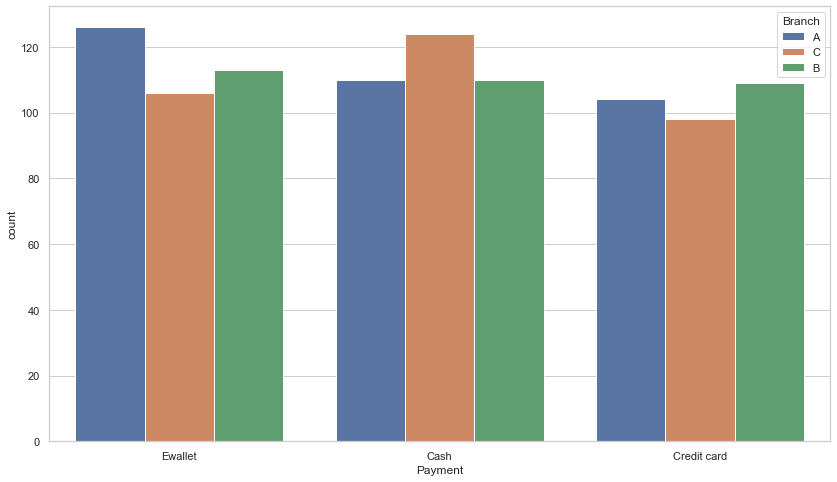

In [308]:
plt.figure(figsize = (14,8))
sns.countplot('Payment', hue ='Branch', data =sales)

In [314]:
 sales[['Branch','Payment','Product line']].groupby(['Payment','Branch']).count()

Product line
Payment     Branch              
Cash        A                110
            B                110
            C                124
Credit card A                104
            B                109
            C                 98
Ewallet     A                126
            B                113
            C                106

<AxesSubplot:xlabel='Customer type', ylabel='count'>

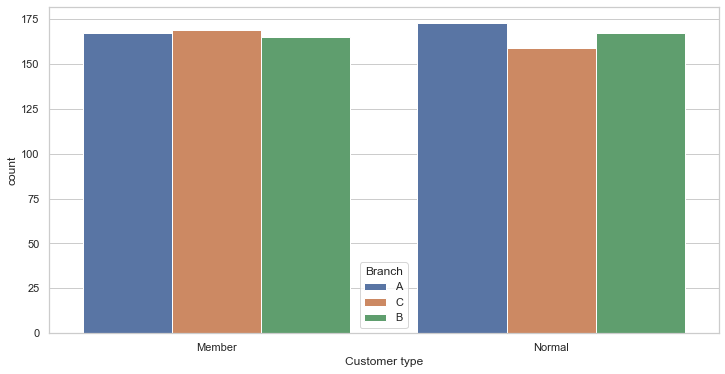

In [320]:
#Customer Analysis
plt.figure(figsize =(12,6))
sns.countplot('Customer type',hue ='Branch',data = sales)

In [322]:
sales[['Customer type','Branch','Invoice ID']].groupby(['Customer type','Branch']).count()

Invoice ID
Customer type Branch            
Member        A              167
              B              165
              C              169
Normal        A              173
              B              167
              C              159

In [325]:
#Does customer type influences the sales?
total = sales.groupby('Customer type')['Total'].sum().reset_index()

In [331]:
total = total.set_index('Customer type')

In [ ]:
#Do the customer type influence customer rating? Let's find out

Text(0.5, 1.0, 'Customer type')

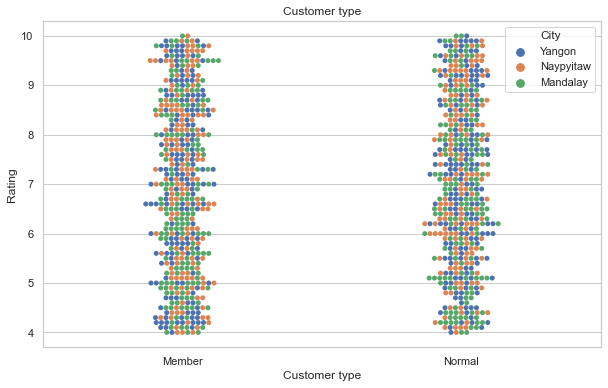

In [336]:
plt.figure(figsize = (10,6))
sns.swarmplot(x='Customer type',y='Rating', hue ='City',data= sales).set_title('Customer type')

In [338]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


In [339]:
from wordcloud import WordCloud

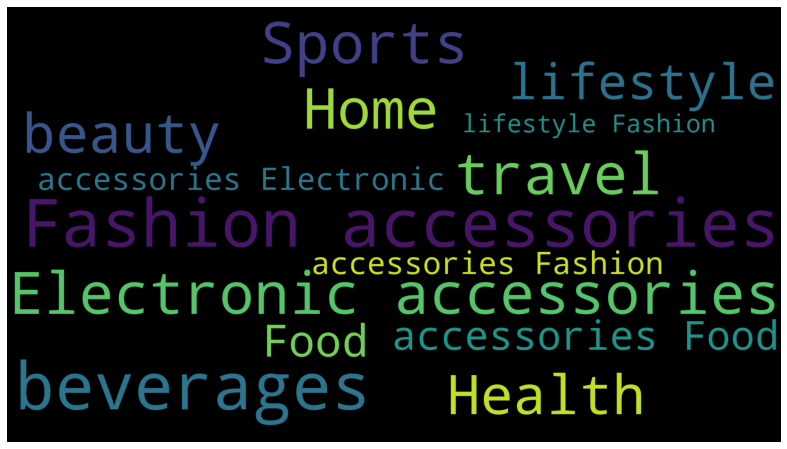

In [341]:
plt.subplots(figsize=(15,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(sales["Product line"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()